In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# reading the dataset and loading into a dataframe
df = pd.read_csv('../../data/data.csv')

df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
# printing the shape: (rows, columns)
df.shape

(5842, 2)

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


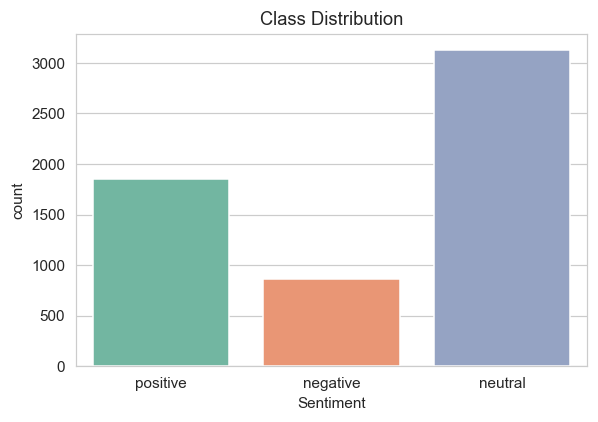

In [5]:
# distribution of datapoints into respective class labels
print(df['Sentiment'].value_counts())

# plotting the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Sentiment')
plt.show()

In [6]:
# finding duplicate sentences
df[df['Sentence'].duplicated()]

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [7]:
# extracting indices of duplicate sentences
duplicate_indices = df[df['Sentence'].duplicated()].index.to_list()

dup_df = None

# extracting each set of duplicate sentences
for index in duplicate_indices:
    dup_df = pd.concat([dup_df, df[df['Sentence'] == df['Sentence'].loc[index]]])

dup_df

,Sentence,Sentiment
66,Finnish GeoSentric 's net sales decreased to E...,negative
266,Finnish GeoSentric 's net sales decreased to E...,neutral
163,Sales in Finland decreased by 10.5 % in Januar...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
195,Full-year operating result for 2008 was 3.6 mi...,neutral
...,...,...
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
1860,RISING costs have forced packaging producer Hu...,neutral
5837,RISING costs have forced packaging producer Hu...,negative
186,"In the building and home improvement trade , s...",negative


In [8]:
# dropping the duplicate sentences with "neutral" sentiment
for index in duplicate_indices:
    temp = df[df['Sentence'] == df['Sentence'].loc[index]]
    dup_idx = temp[temp['Sentiment'] == 'neutral'].index[0]
    df = df.drop(index=dup_idx)

# resetting the index
df.reset_index()
    
# verifying if duplicate sentences are dropped
df[df['Sentence'].duplicated()]

,Sentence,Sentiment


neutral     2610
positive    1852
negative     860
Name: Sentiment, dtype: int64


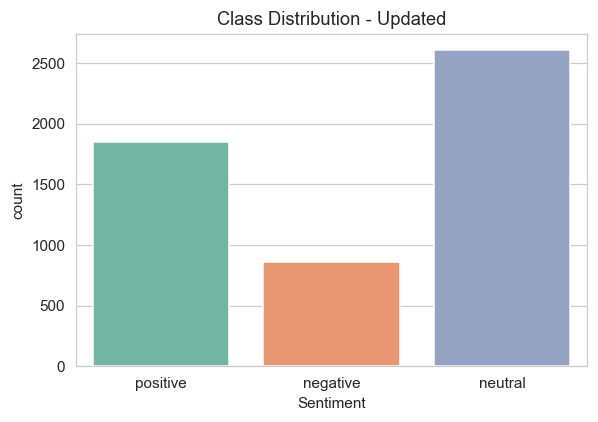

In [9]:
# updated distribution of datapoints into respective class labels
print(df['Sentiment'].value_counts())

# plotting the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution - Updated')
axes.set_xlabel('Sentiment')
plt.show()

In [10]:
# counting null values in the dataset
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [11]:
# save the cleaned dataset
df.to_csv('../../data/data_clean_ashutosh.csv', index=False)